### Draw the topography

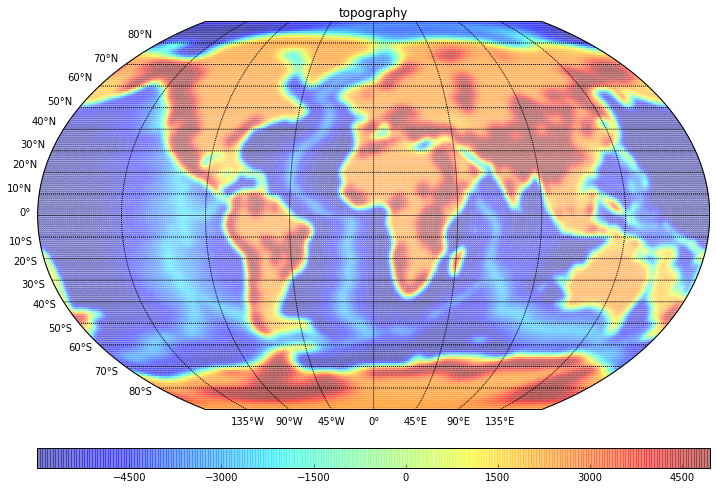

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

data = np.genfromtxt('../data/Paleotopography_bathymetry/Golonka_rev210/10Ma_Golonka.xyz')
#data = np.genfromtxt('../data/Paleotopography_bathymetry/Golonka_rev210.bak/10Ma_Golonka.xyz')
x = data[:,0]
y = data[:,1]
z = data[:,2]

plt.figure(figsize=(15, 8))

m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)    
xi, yi = m(x, y)
cs = m.scatter(xi, yi, marker='.', c=z, alpha=0.5, lw=0)

m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
#m.drawcoastlines()   

cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title("topography")
plt.show()
plt.close()

### Draw temperature
lons:0-360 [1] 
Lats:(90)-(-90) [0] 

[[   0.     90.    -14.89]
 [   0.     89.    -14.89]
 [   0.     88.    -14.88]
 ..., 
 [ 360.    -88.    -49.27]
 [ 360.    -89.    -50.73]
 [ 360.    -90.    -51.74]]


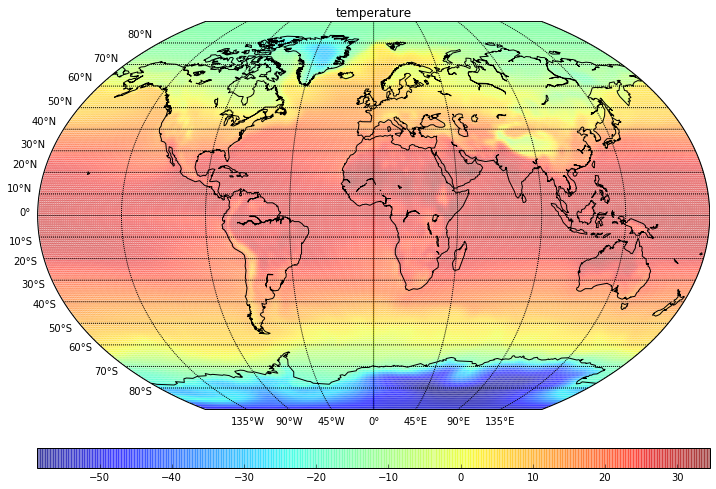

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

data = np.genfromtxt('../data/SurfaceTemperature_NASA.xyz')
#print data
x = data[:,0]
y = data[:,1]
z = data[:,2]

plt.figure(figsize=(15, 8))

m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)    
xi, yi = m(x, y)
cs = m.scatter(xi, yi, marker='.', c=z, alpha=0.5, lw=0)

m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
m.drawcoastlines()   

cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title("temperature")
plt.show()

### Draw output 
Lons: 0-360 [1]
Lats: 0-180 [0]

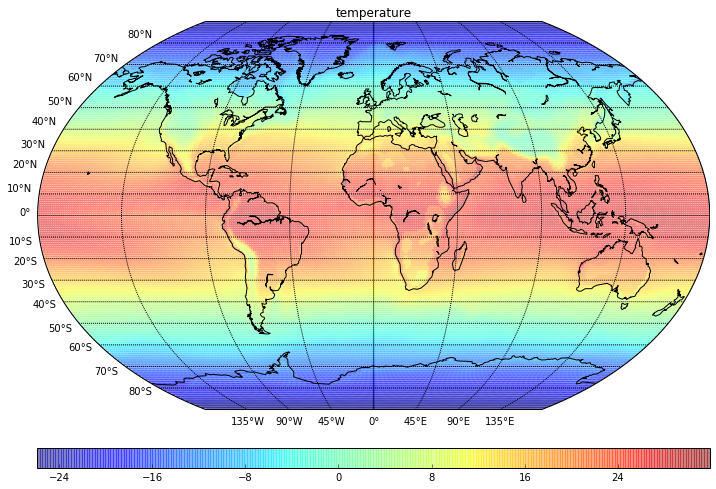

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

data = np.genfromtxt('./output/[0Ma_Golonka.xyz]_PlotData_Atm.xyz',skip_header=1)
for d in data:
    d[1]=90-d[1]
x = data[:,0]
y = data[:,1]
z = data[:,6]

plt.figure(figsize=(15, 8))

m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)    
xi, yi = m(x, y)
cs = m.scatter(xi, yi, marker='.', c=z, alpha=0.5, lw=0)

m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
m.drawcoastlines()   

cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title("temperature")
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

adata = np.loadtxt('./output/[10Ma_Golonka.xyz]_PlotData_Atm.xyz', skiprows=1)
data = adata[:,6]
data = data[~np.isnan(data)]
if data:
    print np.nanmin(data), np.nanmax(data)
    # the histogram of the data
    n, bins, patches = plt.hist(data, 50, normed=1, facecolor='g', alpha=0.75)

    plt.grid(True)
    plt.show()
else:
    print "NO valid data found."

NO valid data found.
